In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C://Users//xrist//OneDrive//Υπολογιστής//Github_repos//Bike-Analysis//bikeData.txt")
df = pd.DataFrame(data)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


**Data Cleaning & Information for Data**

In [5]:
df['Month'] = df['Month'].astype('str')

In [6]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [7]:
df['Customer_Age'].agg(['mean', 'std', 'sum'])

mean    3.591921e+01
std     1.102194e+01
sum     4.060164e+06
Name: Customer_Age, dtype: float64

In [8]:
df.shape

(113036, 18)

In [9]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [10]:
df['Seasons'] = df['Month'].apply(lambda month : 'Winter' if month in ['December', 'January', 'February'] else 'Spring' if month in ['March', 'April', 'May'] else 'Summer' if month in ['June', 'July', 'August'] else 'Fall')

In [11]:
df['Customer_Gender'] = df['Customer_Gender'].replace('F', 'Female')

In [12]:
df['Customer_Gender'] = df['Customer_Gender'].replace('M', 'Male')

In [13]:
df.drop('Date', axis = 1, inplace = True)

In [14]:
df['Clean_Profit'] = (df['Unit_Price'] * df['Order_Quantity']) - (df['Unit_Cost'] * df['Order_Quantity'])

In [15]:
df.groupby(['Country', 'State'])['Unit_Cost', 'Unit_Price', 'Clean_Profit'].mean()

C:\Users\xrist\AppData\Local\Temp\ipykernel_2260\3159633509.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Country', 'State'])['Unit_Cost', 'Unit_Price', 'Clean_Profit'].mean()


Unit_Cost   Unit_Price  Clean_Profit
Country        State                                                      
Australia      New South Wales       346.941222   582.026892    433.018056
               Queensland            390.847126   657.545977    494.998851
               South Australia       401.039642   673.658568    467.722506
               Tasmania              320.220994   538.060773    423.219613
               Victoria              366.118351   617.657912    460.629987
Canada         Alberta               312.678571   515.678571    416.964286
               British Columbia      132.971380   227.646075    267.212808
               Ontario                 4.000000    11.000000    128.000000
France         Charente-Maritime     234.864865   405.324324    325.432432
               Essonne               357.078471   599.460765    437.060362
               Garonne (Haute)       296.961538   501.432692    407.067308
               Hauts de Seine        315.047970   528.621771    400.961255
               Loir et Cher          241.400000   414.933333    357.941667
               Loiret                301.439791   510.633508    415.345550
               Moselle               275.440415   462.735751    352.233161
               Nord                  294.376048   495.407186    397.277246
               Pas de Calais         153.311111   255.511111    306.600000
               Seine (Paris)         283.942440   479.444158    374.517612
               Seine Saint Denis     266.023753   447.130641    358.717340
               Seine et Marne        354.284264   600.705584    497.850254
               Somme                 258.895522   433.343284    407.679104
               Val d'Oise            207.954545   354.681818    337.712121
               Val de Marne          176.670886   299.569620    326.873418
               Yveline               312.813417   528.781971    415.664570
Germany        Bayern                319.779804   542.103787    413.859748
               Brandenburg           319.575758   534.272727    368.939394
               Hamburg               313.880174   527.394336    399.663943
               Hessen                320.214765   538.819631    406.631292
               Nordrhein-Westfalen   262.134461   444.710950    369.338969
               Saarland              299.312635   505.798556    389.804332
United Kingdom England               269.370925   455.623789    356.656608
United States  Alabama                 1.000000     2.000000     26.250000
               Arizona               639.000000  1176.500000   1069.750000
               California            248.772739   424.804365    362.275367
               Florida               253.428571   452.857143    376.857143
               Georgia               125.000000   204.250000    282.125000
               Illinois              253.571429   438.500000    369.785714
               Kentucky               17.600000    47.400000    263.200000
               Massachusetts        1266.000000  2320.000000   1054.000000
               Minnesota              14.666667    19.333333     71.333333
               Mississippi            21.500000    29.000000    138.000000
               Missouri               10.000000    27.000000    207.166667
               Montana                 8.000000    21.333333    236.833333
               New York               41.100000    70.900000    164.300000
               North Carolina          3.000000     7.500000     69.750000
               Ohio                    6.785714    17.285714    249.678571
               Oregon                221.277715   378.873628    344.274499
               South Carolina          7.200000    17.200000     79.400000
               Texas                  66.200000   115.133333    137.466667
               Utah                   97.800000   163.200000    260.400000
               Virginia                7.500000    20.000000    232.500000
               Washington            230.926314   395.589844   

In [16]:
def year_loc(df, year):
    return df.loc[df['Year'] == year]

In [17]:
df2011 = year_loc(df, 2011)
df2012 = year_loc(df, 2012)
df2013 = year_loc(df, 2013)
df2014 = year_loc(df, 2014)
df2015 = year_loc(df, 2015)
df2016 = year_loc(df, 2016)
df2017 = year_loc(df, 2017)

In [18]:
df.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Seasons,Clean_Profit
0,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Fall,600
1,26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Fall,600
2,23,March,2014,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,Spring,1725
3,23,March,2016,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,Spring,1500
4,15,May,2014,47,Adults (35-64),Female,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,Spring,300


> Temporary DataFrames

In [19]:
def get_clean_Profit(df, category, year):
    return df.loc[(df['Year'] == year) & (df['Product_Category'] == category), 'Clean_Profit'].sum()

bikes_sum = []
clothing_sum = []
acc_sum = []

for x in range(2011, 2017):
    bikes_sum.append(get_clean_Profit(df,'Bikes', x))
    clothing_sum.append(get_clean_Profit(df, 'Clothing', x))
    acc_sum.append(get_clean_Profit(df,'Accessories', x))

In [20]:
def get_order(df, category, year):
        return df.loc[(df['Year'] == year) & (df['Product_Category'] == category), 'Order_Quantity'].sum()

bikes_sum_order = []
clothing_sum_order = []
acc_sum_order = []

for x in range(2011, 2017):
    bikes_sum_order.append(get_order(df,'Bikes', x))
    clothing_sum_order.append(get_order(df, 'Clothing', x))
    acc_sum_order.append(get_order(df,'Accessories', x))

In [21]:
years = [2011, 2012, 2013, 2014, 2015, 2016]

In [22]:
bikes_df = {
    'Year' : years,
    'Summary' : bikes_sum,
    'Order' : bikes_sum_order
}
bikes = pd.DataFrame(bikes_df)

In [23]:
clothing_df = {
    'Year' : years,
    'Summary' : clothing_sum,
    'Order' : clothing_sum_order
}
clothing = pd.DataFrame(clothing_df)

In [24]:
acc_df = {
    'Year' : years,
    'Summary' : acc_sum,
    'Order' : acc_sum_order
}
accessories = pd.DataFrame(acc_df)

*Visualization*

In [25]:
bikes_summary_100 = bikes['Summary'] / 100

In [26]:
def plt_function(xname, yname, titl):
    plt.figure(figsize = (12,6), layout = 'constrained')
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(titl)

def multiple_plt_function(xxname, yyname, titll):
    plt.xlabel(xxname)
    plt.ylabel(yyname)
    plt.title(titll)

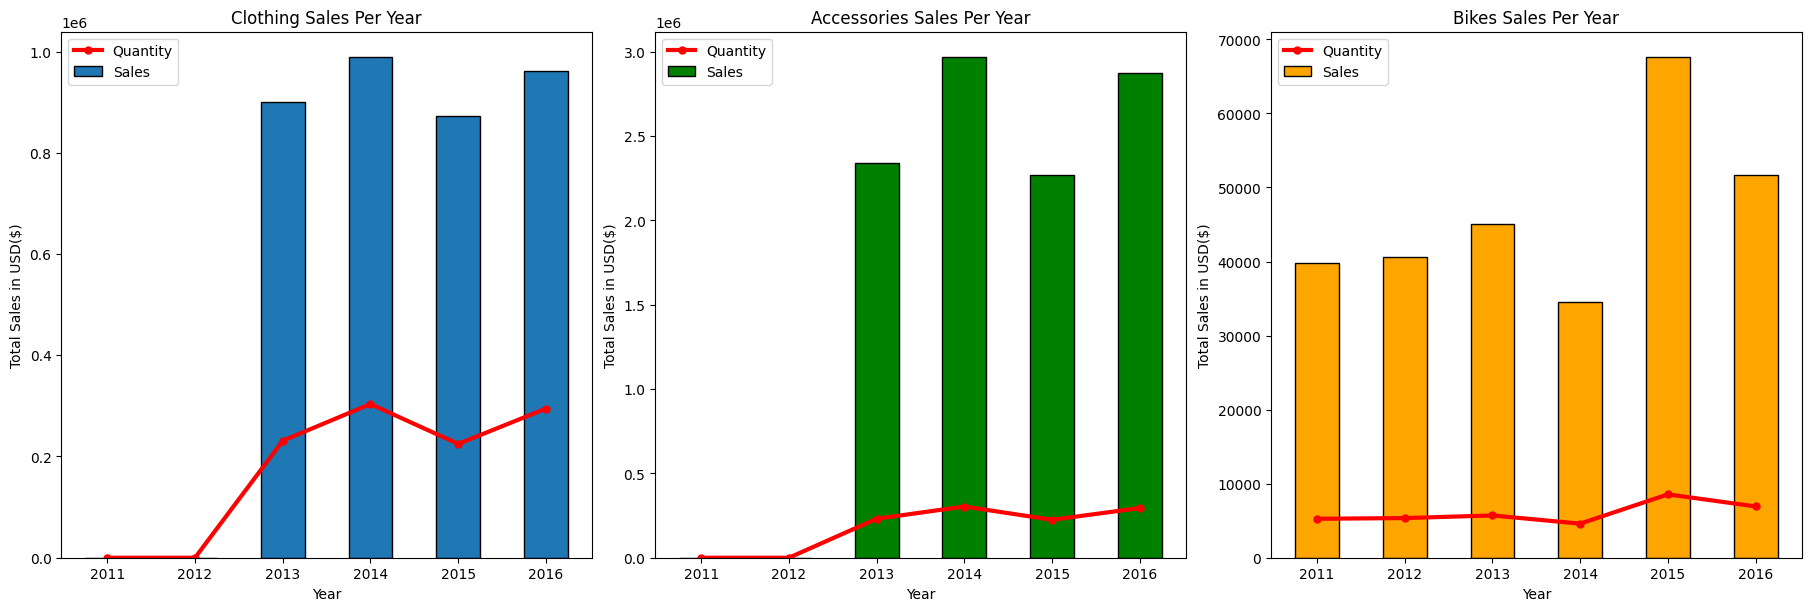

In [27]:
plt.figure(figsize = (18,6), facecolor = 'white', layout = 'constrained')

plt.subplot(131)
plt.bar(clothing['Year'], clothing['Summary'], width = 0.5, edgecolor = 'Black')
plt.plot(accessories['Year'], accessories['Order'], linewidth = 3, marker = 'o', markersize = 5, color = 'red')
multiple_plt_function('Year', 'Total Sales in USD($)', 'Clothing Sales Per Year')
plt.legend(['Quantity', 'Sales'])

plt.subplot(132)
plt.bar(accessories['Year'], accessories['Summary'],width= 0.5, color = 'green', edgecolor = 'Black')
plt.plot(accessories['Year'], accessories['Order'], linewidth = 3, marker = 'o', markersize = 5, color = 'red')
multiple_plt_function('Year', 'Total Sales in USD($)', 'Accessories Sales Per Year')
plt.legend(['Quantity', 'Sales'])

plt.subplot(133)
plt.bar(bikes['Year'], bikes_summary_100, width = 0.5, color = 'orange', edgecolor = 'Black')
plt.plot(bikes['Year'], bikes['Order'], linewidth = 3, marker = 'o', markersize = 5, color = 'red')

multiple_plt_function('Year', 'Total Sales in USD($)', 'Bikes Sales Per Year')
plt.legend(['Quantity', 'Sales'])

In [28]:
pivot_table = df.pivot_table(index = 'Year', columns = 'Product_Category',values = 'Order_Quantity', aggfunc = 'mean')
print(pivot_table)

Product_Category  Accessories     Bikes   Clothing
Year                                              
2011                      NaN  1.964886        NaN
2012                      NaN  2.000000        NaN
2013                15.383827  1.000000  15.624326
2014                15.155378  1.000000  14.991175
2015                14.964393  1.498424  15.135113
2016                14.701373  1.504561  14.571128


In [29]:
grouped_products = df.groupby(by = 'Product_Category')
sum_grouped_products = grouped_products['Clean_Profit'].apply(lambda x : x.sum())

Text(0, 0.5, 'Products')

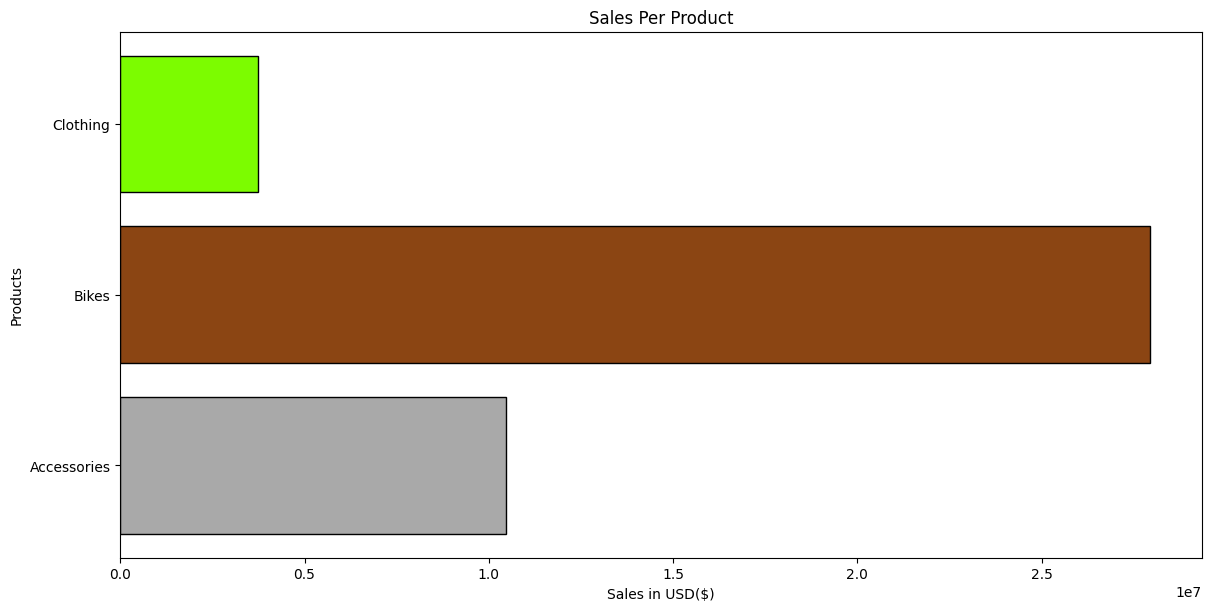

In [30]:
plt.figure(figsize = (12,6), layout = 'constrained')

plt.barh(sum_grouped_products.index, sum_grouped_products, edgecolor = 'black', color = ['darkgrey', 'saddlebrown', 'lawngreen'])

plt.title('Sales Per Product')
plt.xlabel('Sales in USD($)')
plt.ylabel('Products')

In [31]:
age_grouped = df.groupby(by = 'Age_Group')[['Order_Quantity', 'Profit']].sum()

In [32]:
age_grouped

,Order_Quantity,Profit
Age_Group,,
Adults (35-64),672417,16321582
Seniors (64+),9877,138165
Young Adults (25-34),446875,11386761
Youth (<25),216147,4374592


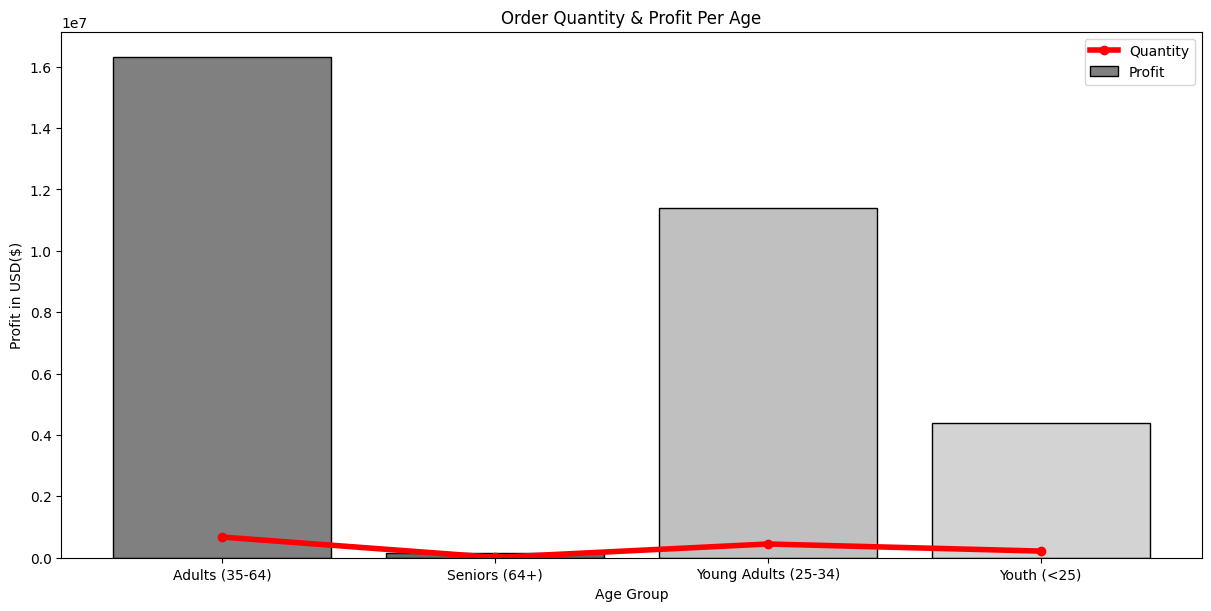

In [48]:
plt_function('Age Group', 'Profit in USD($)', 'Order Quantity & Profit Per Age')

plt.bar(age_grouped.index, age_grouped['Profit'], color = ['grey', 'dimgrey', 'silver', 'lightgrey'], edgecolor = 'Black', label = 'Profit')

plt.plot(age_grouped.index, age_grouped['Order_Quantity'], color = 'red', linewidth = 4, label = 'Quantity', marker = 'o')

plt.legend()

TODO: Countries


In [43]:
grouped_country = df.groupby(by = 'Country')
gc = grouped_country['Clean_Profit'].apply(lambda  cou : cou.sum())

<BarContainer object of 6 artists>

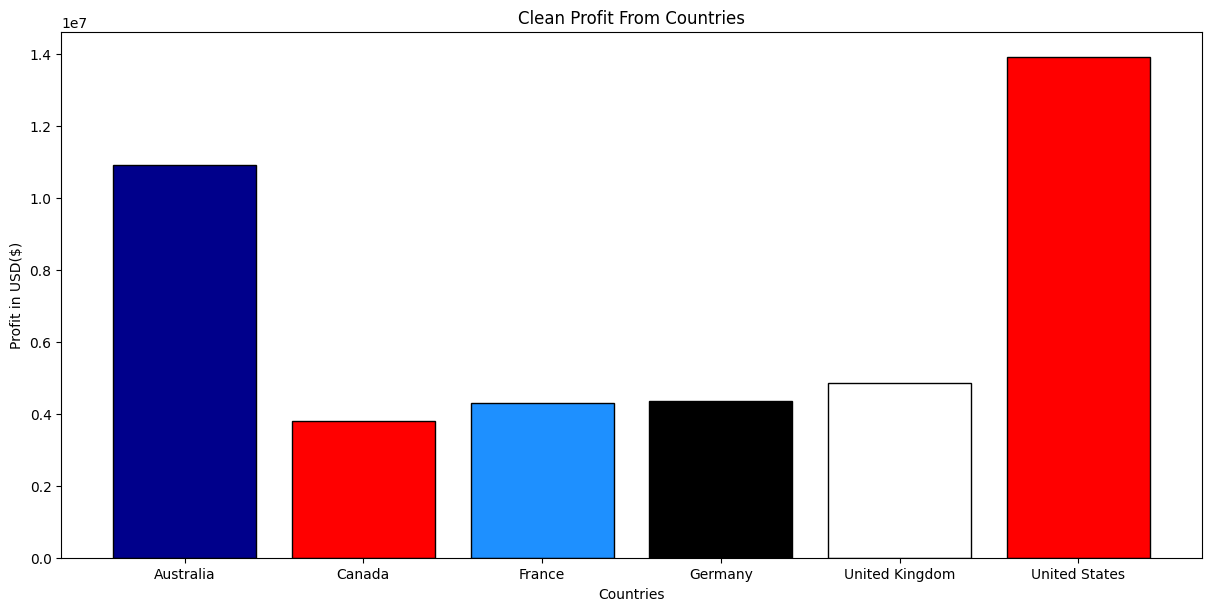

In [66]:
plt_function('Countries', 'Profit in USD($)', 'Clean Profit From Countries')

plt.bar(gc.index, gc, color = ['darkblue', 'red', 'dodgerblue', 'black', 'white', 'red'], edgecolor = 'Black')


- Best Selling Product

In [62]:
df['Product'].loc[df['Product'].value_counts().max()]

'Water Bottle - 30 oz.'

- Top 10 Selling Products

In [100]:
grouped_proproduct = df.groupby('Product')['Order_Quantity'].sum()
grouped_proproduct = pd.DataFrame(grouped_proproduct)
top_10_products = grouped_proproduct.sort_values('Order_Quantity', ascending= False).head(10)
top_10_products

,Order_Quantity
Product,
Water Bottle - 30 oz.,164086
Patch Kit/8 Patches,157583
Mountain Tire Tube,102792
AWC Logo Cap,67316
"Sport-100 Helmet, Red",63663
Road Tire Tube,62296
Fender Set - Mountain,62118
"Sport-100 Helmet, Black",62105
Touring Tire Tube,56802


In [104]:
low_10_products = grouped_proproduct.sort_values('Order_Quantity', ascending= True).head(10)
low_10_products

,Order_Quantity
Product,
"Mountain-500 Black, 52",40
"Mountain-500 Silver, 48",52
"Road-650 Red, 52",52
"Touring-3000 Blue, 50",70
"Mountain-100 Black, 42",73
"Mountain-100 Silver, 48",75
"Mountain-100 Silver, 42",77
"Mountain-100 Silver, 44",83
"Touring-3000 Yellow, 62",83


AttributeError: module 'matplotlib.pyplot' has no attribute 'sublot'

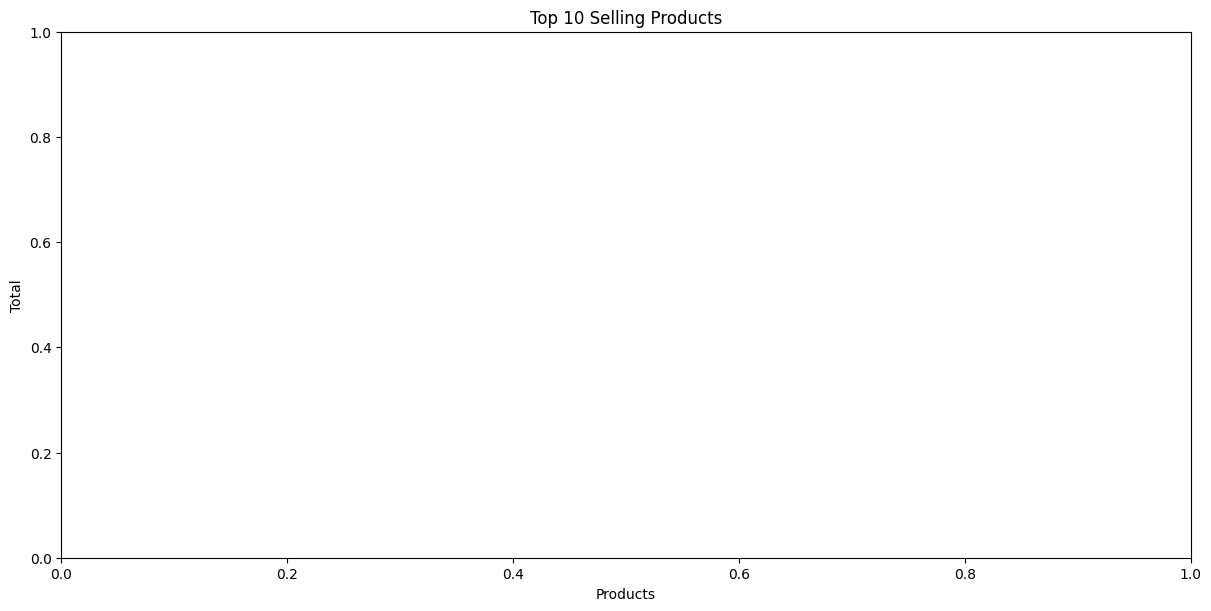

In [105]:
plt_function('Products', 'Total', 'Top 10 Selling Products')

plt.sublot(121)
plt.bar(top_10_products.index, top_10_products.Order_Quantity, edgecolor = 'Black', color = 'olive')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(color = 'lightgrey', linestyle = '--')

plt.subplot(122)